<a href="https://colab.research.google.com/github/Suresh18698/Diabetes_Prediction/blob/main/Diabetes_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem-Requirements:

1.Read the file and do exploratory analysis of the dataset, visulaise, share what you observe

2.Follow Datascience process steps to build ML model to predict diabetes

3.Report your accuracy metrics

4.Based on your model, Summarize factors influence diabetes prediction Use Python to build model

1) DATA CLEANING

In [64]:
import numpy as np
import pandas as pd

In [65]:
df=pd.read_csv('/content/diabetes (1).csv') # read the datasets

In [66]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
# 1) delete duplicates
print (df. shape)
df=df.drop_duplicates()
df.shape

(768, 9)


(768, 9)

NO DUPLICATES ARE IN DATASETS

In [68]:
# 2) CHECK THE DATA STRUCTURE
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


DATAS ARE STORE IN CORRECT FORMATE

In [69]:
#3) TREATING NULL VALUES
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [70]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [71]:
df=df.replace(0,np.NaN)

In [72]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [73]:
def treat_null(df,column):
  df[column].fillna(df[column].mean(),inplace=True)
def treat_null_cat(df,column):
  df[column].fillna(df[column].median(),inplace=True)

In [74]:
for i in ['Glucose','BloodPressure','Insulin']:
  treat_null(df,i)
for j in ['BMI','SkinThickness']:
  treat_null_cat(df,j)

In [75]:
df['Pregnancies'].fillna(0,inplace=True)

NO NULL VALUES ARE IN DIABETES

In [76]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,268.0
mean,3.845052,121.686763,72.405184,29.108073,155.548223,32.455208,0.471876,33.240885,1.0
std,3.369578,30.435949,12.096346,8.791221,85.021108,6.875177,0.331329,11.760232,0.0
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,1.0
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,1.0
50%,3.000000,117.000000,72.202592,29.000000,155.548223,32.300000,0.372500,29.000000,1.0
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.0
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.0


In [77]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [78]:
df['Outcome'].fillna(0,inplace=True)

In [79]:
#)4)TREATING OUTLIERS THIS IS MEDICAL FIELD DATAS OUTLIERS ARE IMPORTANT IN THIS DATASETS

2)FEATURE ENGINEERING

In [80]:
def fat(df):
  if df>25:
    return 1
  else:
    return 0
df['fat']=[fat(i) for i in df['BMI']]
def excess_Glucose(df):
  if df>100:
    return 1
  else:
    return 0
df['excess_glocose']=[excess_Glucose(i) for i in df['Glucose']]
def lowBP(df):
  if df<80:
    return 1
  else:
    return 0
df['lowBp']=[lowBP(i) for i in df['BloodPressure']]
def excess_insulin(df):
  if df>300:
    return 1
  else:
    return 0
df['high_insulin']=[excess_insulin(i) for i in df['Insulin']]

In [81]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,fat,excess_glocose,lowBp,high_insulin
0,6.0,148.0,72.0,35.0,155.548223,33.6,0.627,50,1.0,1,1,1,0
1,1.0,85.0,66.0,29.0,155.548223,26.6,0.351,31,0.0,1,0,1,0
2,8.0,183.0,64.0,29.0,155.548223,23.3,0.672,32,1.0,0,1,1,0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21,0.0,1,0,1,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1.0,1,1,1,0


3)EDA

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
def EDA(df,num_features,cat_features,outcome):
  for i in num_features:
    plt.figure(figsize=(15,10))
    sns.histplot(x=i,data=df,hue=outcome,bins=10,kde=True,multiple='stack')
    plt.show()
  sns.pairplot(df,hue=outcome)
  for j in cat_features:
    df.groupby(j)[outcome].mean().sort_values().plot(kind='barh')
    plt.show()

  plt.figure(figsize=(15, 10))
  sns.heatmap(df.corr(),cmap='RdBu_r',annot=True)
  plt.show()

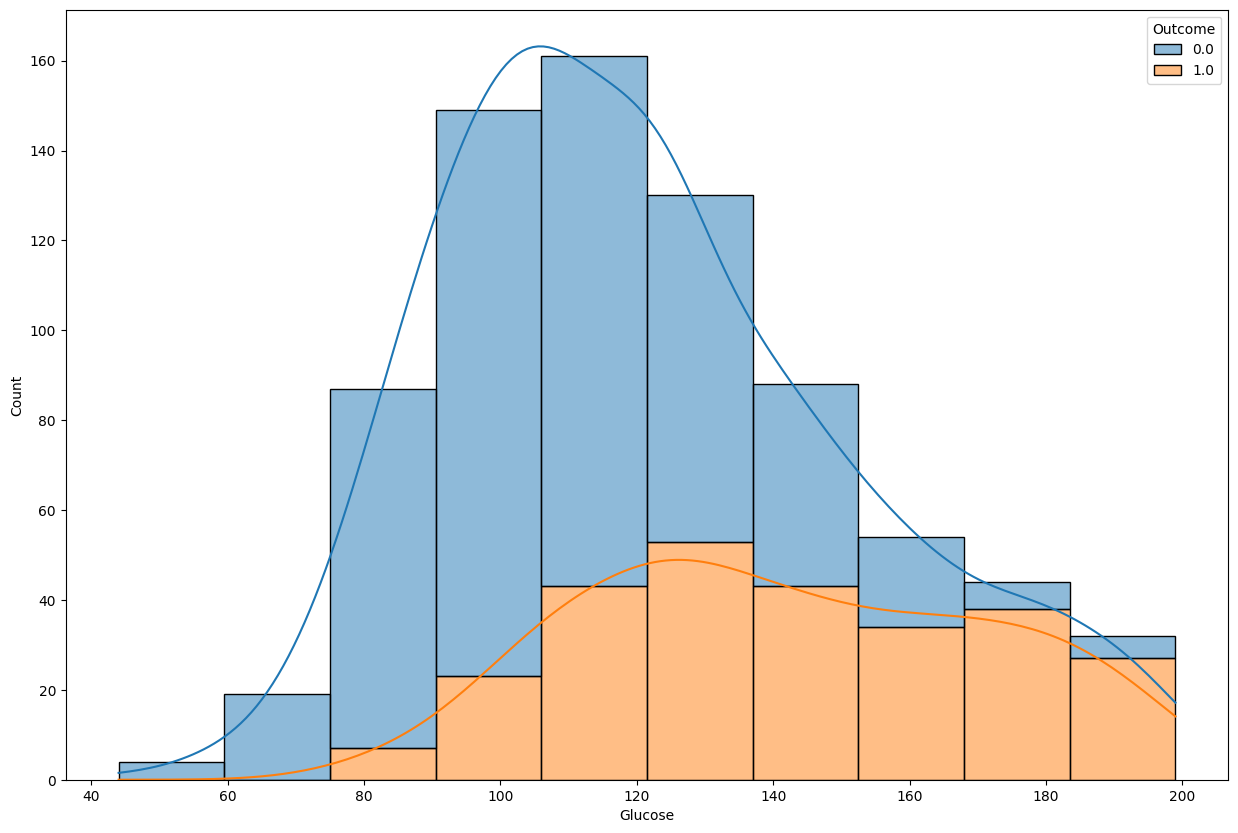

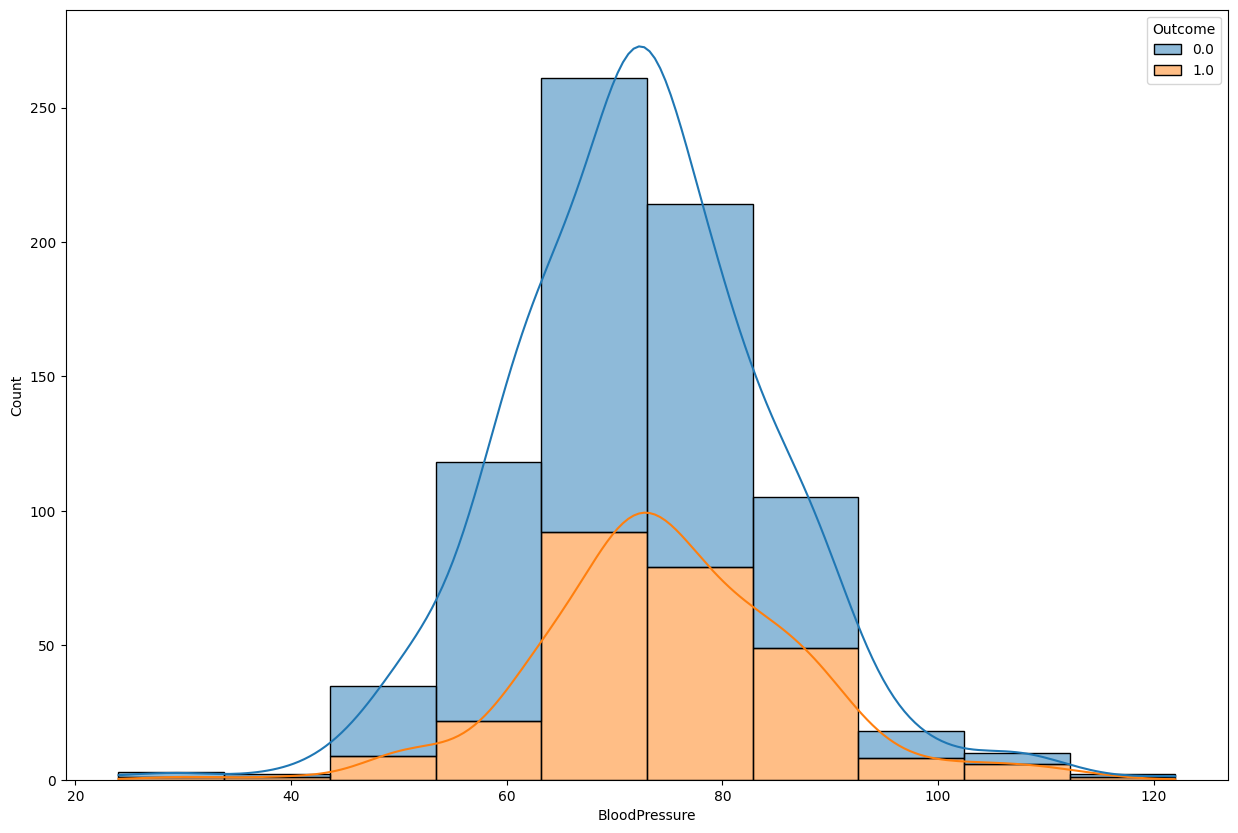

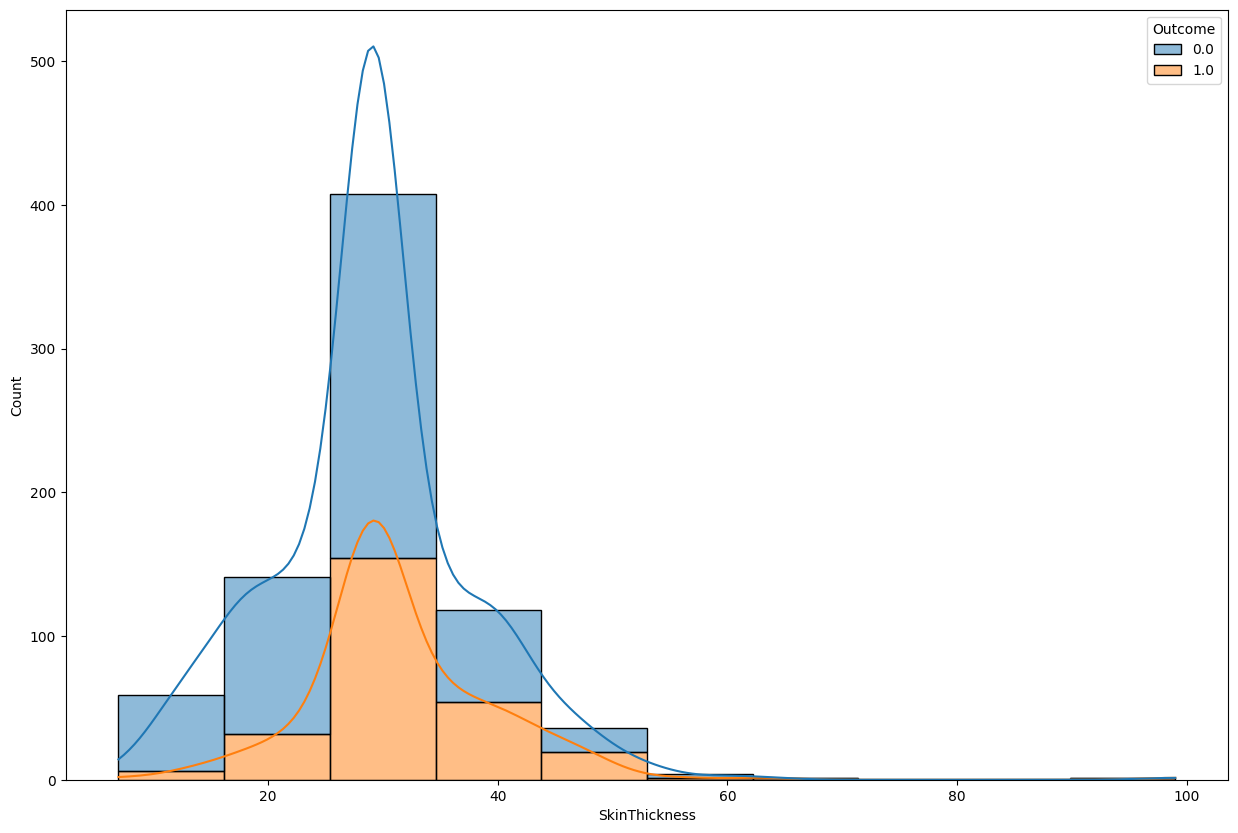

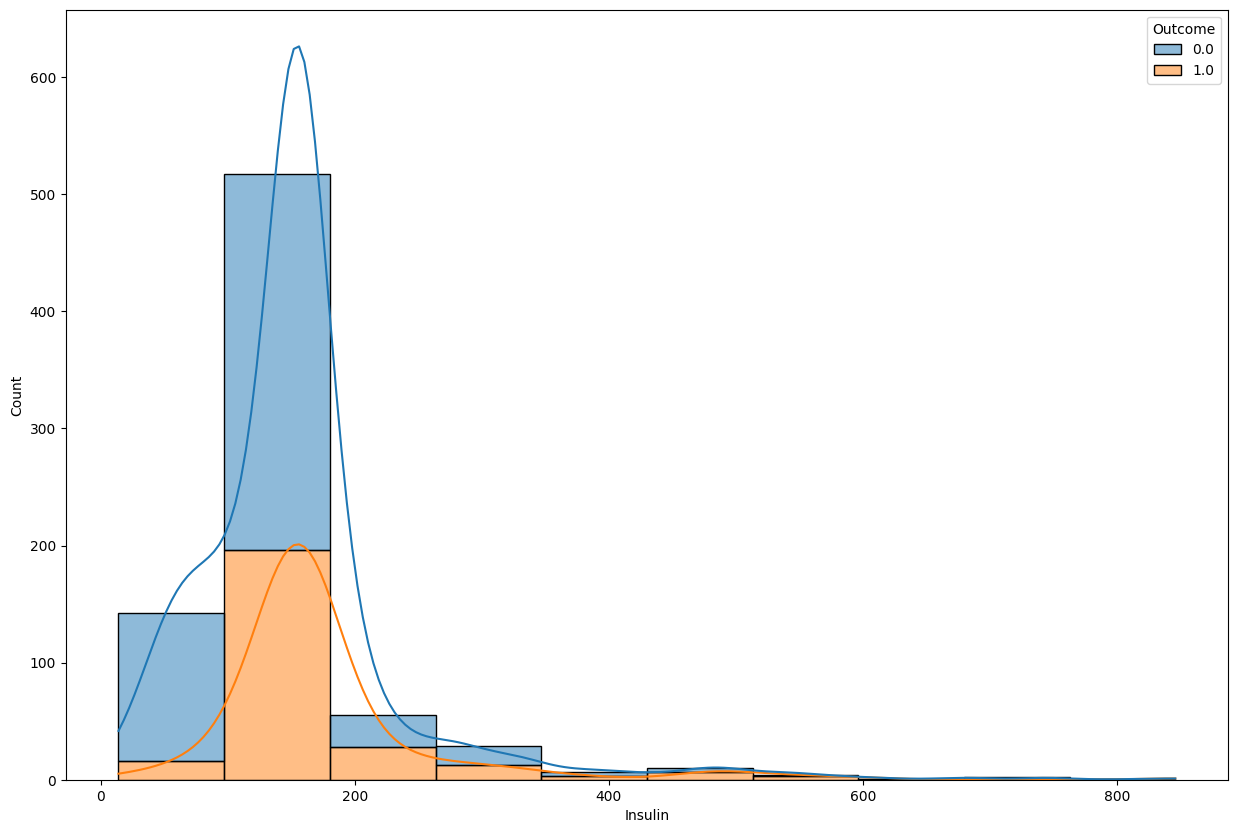

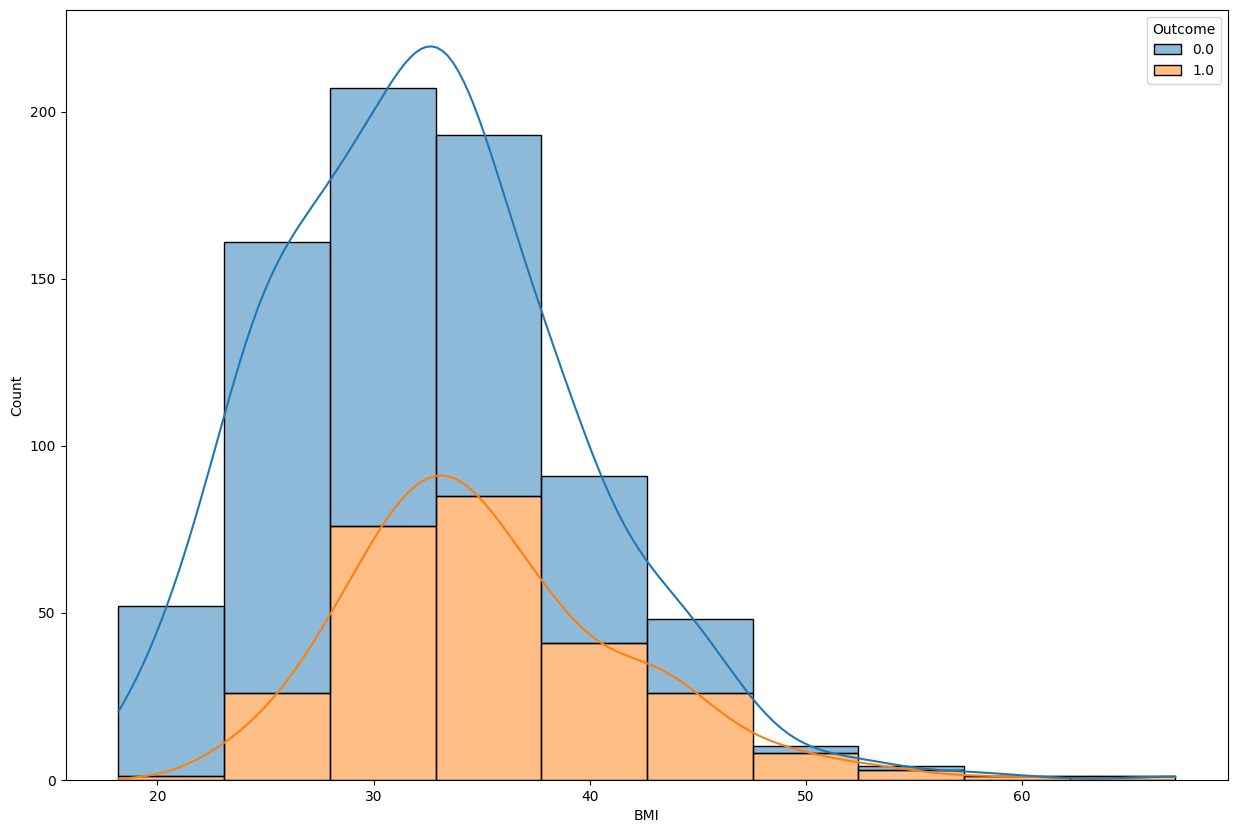

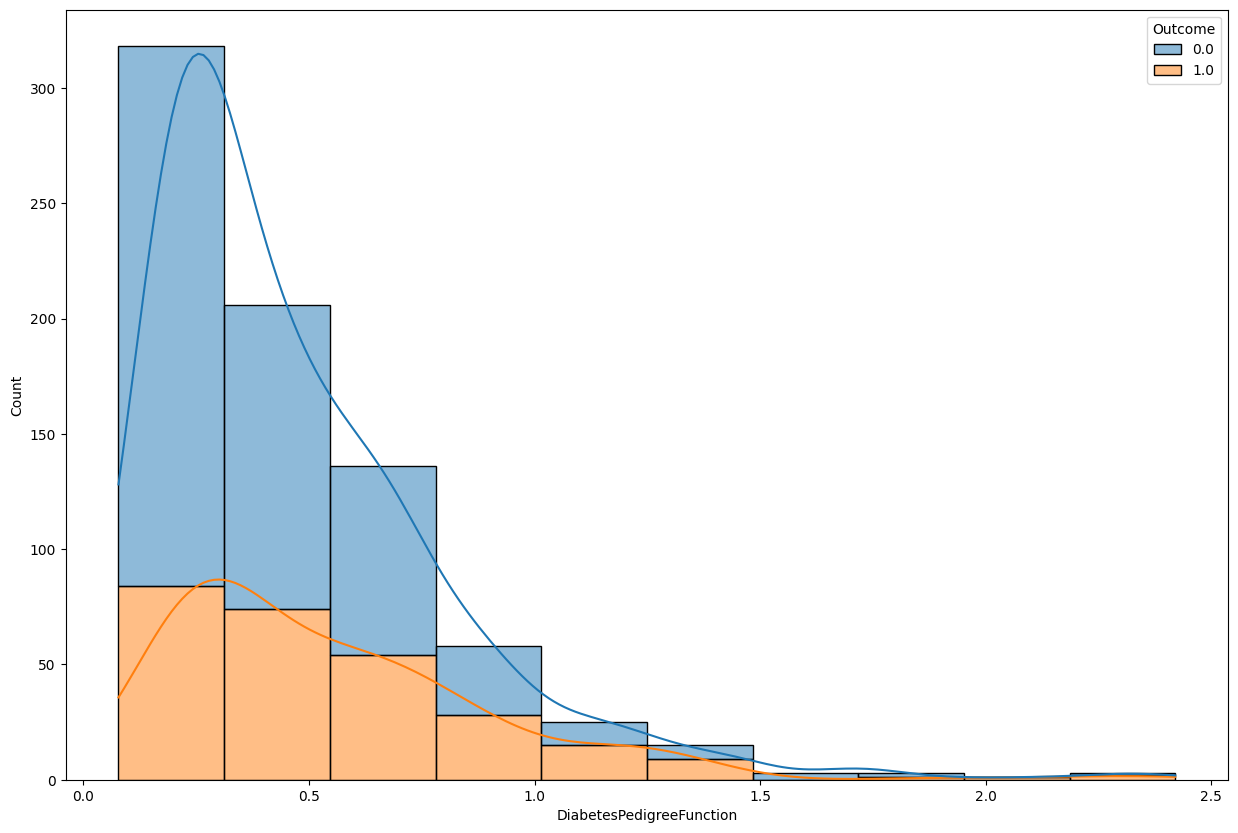

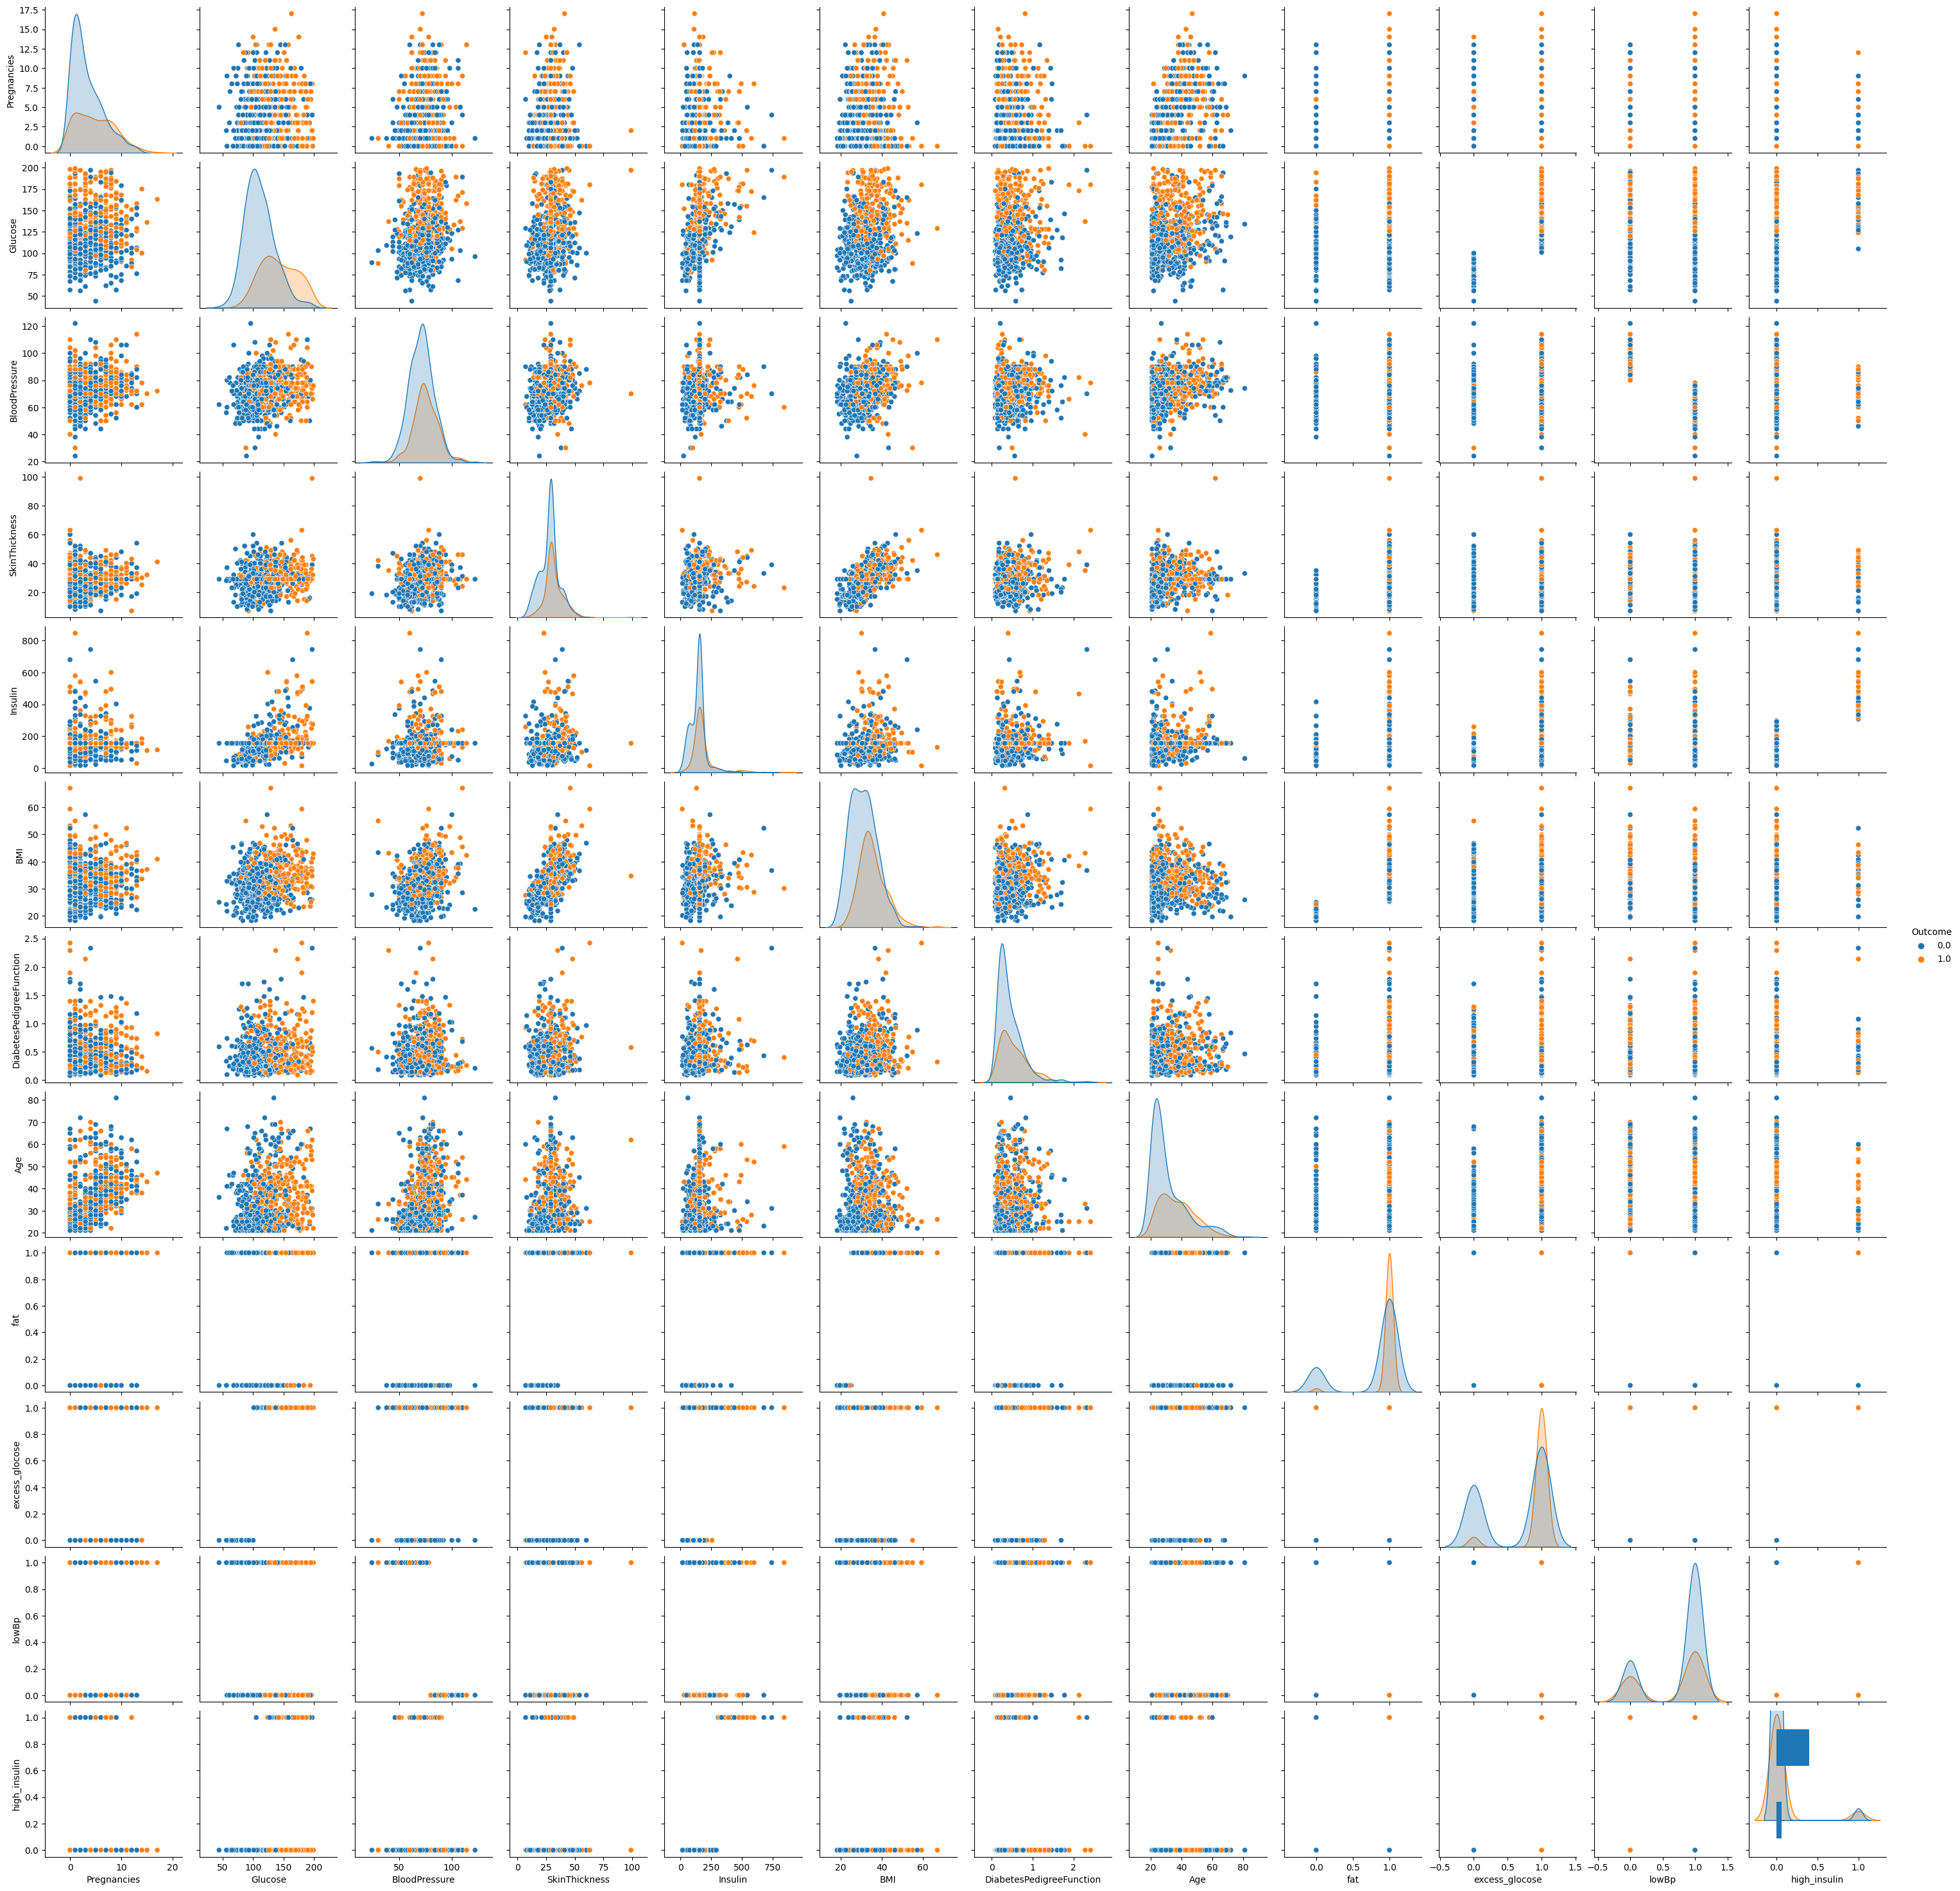

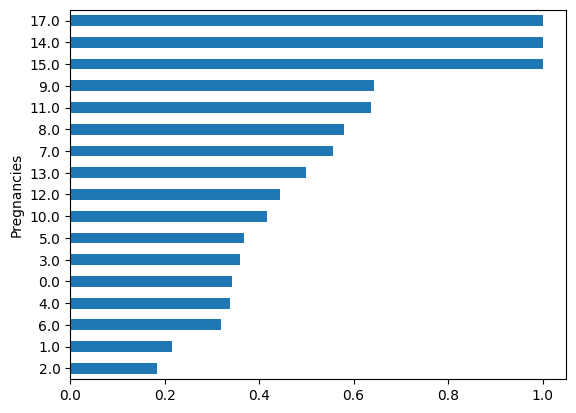

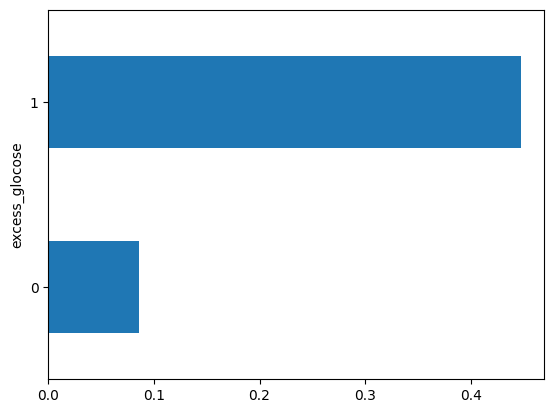

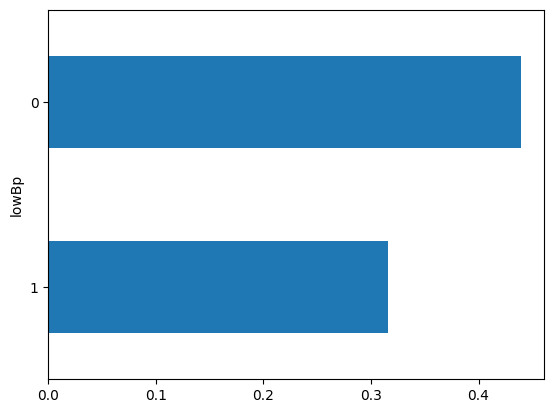

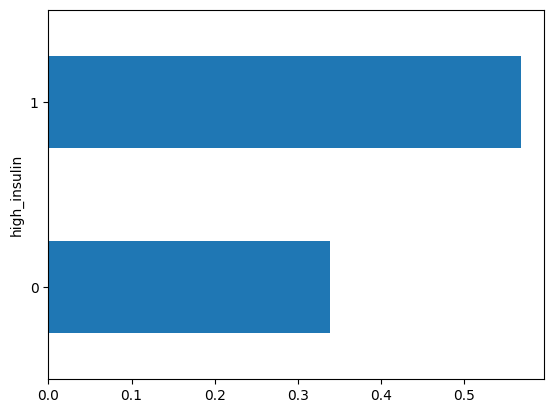

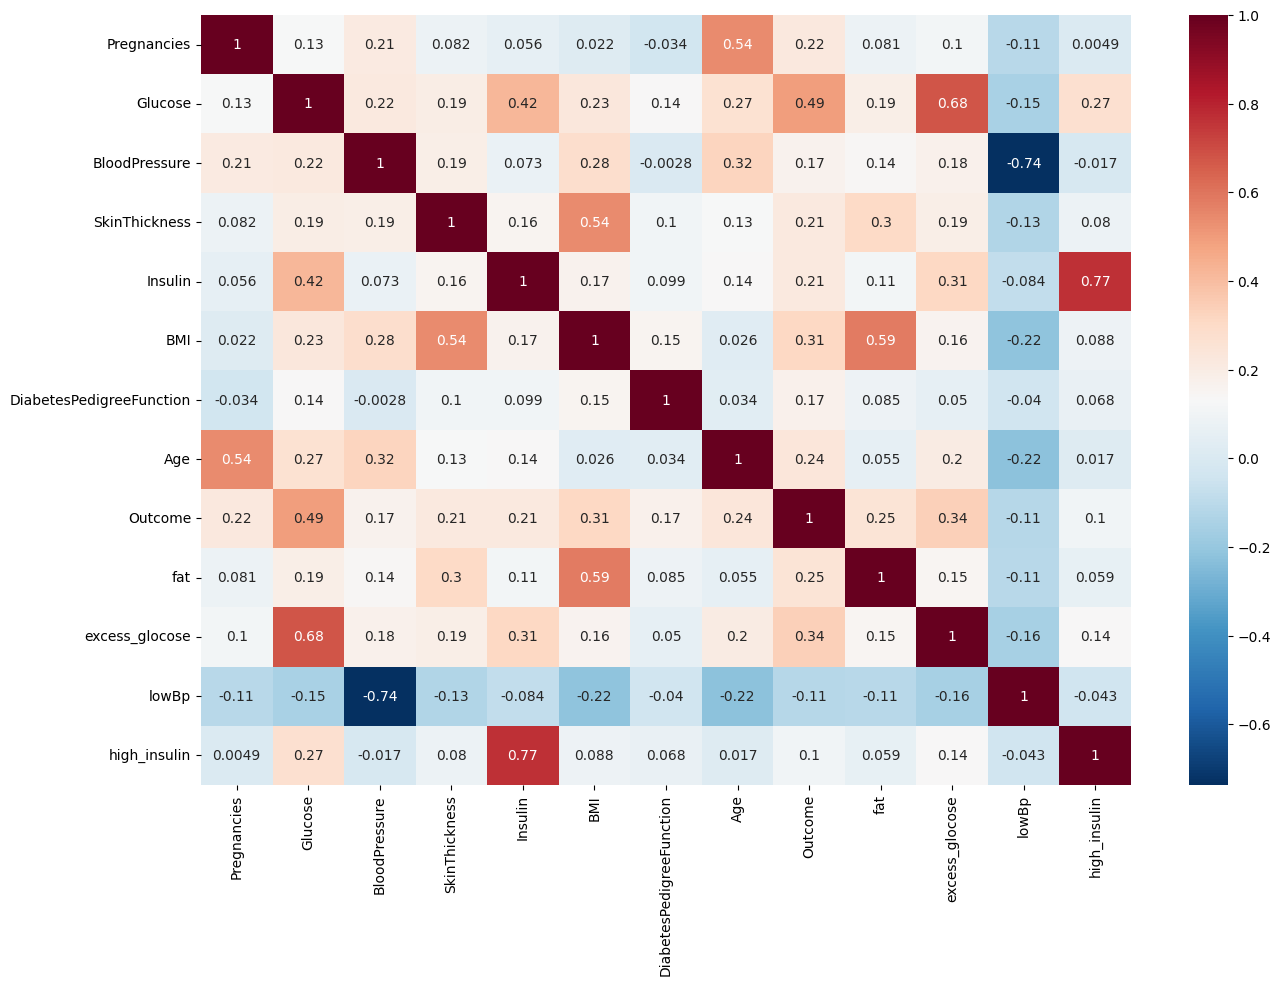

In [84]:
num_features=["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"]
cat_features=['fat','Pregnancies','excess_glocose','lowBp','high_insulin']
EDA(df,num_features,cat_features,"Outcome")

4)CHECK BALANCING THE DATASETS

In [85]:
def check(df,outcome):
  count_data=pd.DataFrame(df[outcome].value_counts()).reset_index()
  count_data.columns=[outcome,"count"]
  count_data["percentage"]=(count_data["count"]/sum(count_data["count"]))*100
  count_data.columns=[outcome,"count","percentage"]
  return count_data
check(df,"Outcome")

,Outcome,count,percentage
0,0.0,500,65.104167
1,1.0,268,34.895833


5)SPLITTING THE DATASET

In [99]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15,stratify=y)

In [101]:
X_train.shape

(576, 12)

In [102]:
y_train.shape

(576,)

In [103]:
!pip install imblearn
import imblearn

In [104]:
def balancing (x,y):
  from imblearn.combine import SMOTEENN
  from imblearn.under_sampling import RandomUnderSampler
  SM=SMOTEENN(random_state=37)
  X_SM,y_SM=SM.fit_resample(x,y)
  return X_SM,y_SM

In [105]:
X_train,y_train=balancing(X_train,y_train)

In [106]:
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

In [107]:
X_train.shape

(386, 12)

In [108]:
y_train.shape

(386,)

6)SCALING OF DATA

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
scale = StandardScaler()
X_train_scale=scale.fit_transform(X_train)
X_test_scale=scale.transform(X_test)

7)BUILD THE MODEL

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score

In [112]:
def MODEL (model,X_train, X_test, y_train, y_test,k):
  mod=model
  mod=mod.fit(X_train, y_train)
  y_predict_mod=mod.predict(X_test)
  y_pred_train=mod.predict(X_train)
  result= pd.DataFrame({'actual': y_test, 'predict': y_predict_mod})
  score=mod.score(X_test,y_test)
  print('for ' ,k ,' value ',"Train Accuracy : ",round(roc_auc_score(y_train,y_pred_train),3),"Val Accuracy : ", round(np.mean(cross_val_score(mod, X_train, y_train, cv=10,scoring='roc_auc')),3))
  return y_predict_mod,result,score,mod

In [113]:
# LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
y_predict_log,result_L,score_L,log=MODEL(LogisticRegression(random_state=15),X_train_scale, X_test_scale, y_train, y_test,1)

for  1  value  Train Accuracy :  0.947 Val Accuracy :  0.975


In [114]:
# KNN CLAASIFIER MODEL
from sklearn.neighbors import KNeighborsClassifier
for i in range (10,30,2):
  MODEL(KNeighborsClassifier(i),X_train_scale, X_test_scale, y_train, y_test,i)

for  10  value  Train Accuracy :  0.924 Val Accuracy :  0.969
for  12  value  Train Accuracy :  0.919 Val Accuracy :  0.971
for  14  value  Train Accuracy :  0.927 Val Accuracy :  0.974
for  16  value  Train Accuracy :  0.924 Val Accuracy :  0.976
for  18  value  Train Accuracy :  0.921 Val Accuracy :  0.976
for  20  value  Train Accuracy :  0.929 Val Accuracy :  0.976
for  22  value  Train Accuracy :  0.931 Val Accuracy :  0.977
for  24  value  Train Accuracy :  0.923 Val Accuracy :  0.974
for  26  value  Train Accuracy :  0.912 Val Accuracy :  0.975
for  28  value  Train Accuracy :  0.91 Val Accuracy :  0.975


In [115]:
y_predict_knn,result_K,score_K,knn=MODEL(KNeighborsClassifier(28),X_train_scale, X_test_scale, y_train, y_test,28)

for  28  value  Train Accuracy :  0.91 Val Accuracy :  0.975


In [116]:
# DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
for i in range(1,10):
  MODEL(DecisionTreeClassifier(max_depth=i,random_state=15),X_train_scale, X_test_scale, y_train, y_test,i)

for  1  value  Train Accuracy :  0.884 Val Accuracy :  0.876
for  2  value  Train Accuracy :  0.886 Val Accuracy :  0.954
for  3  value  Train Accuracy :  0.958 Val Accuracy :  0.959
for  4  value  Train Accuracy :  0.984 Val Accuracy :  0.959
for  5  value  Train Accuracy :  0.995 Val Accuracy :  0.943
for  6  value  Train Accuracy :  1.0 Val Accuracy :  0.941
for  7  value  Train Accuracy :  1.0 Val Accuracy :  0.941
for  8  value  Train Accuracy :  1.0 Val Accuracy :  0.941
for  9  value  Train Accuracy :  1.0 Val Accuracy :  0.941


In [117]:
y_predict_dt,result_D,score_D,dt=MODEL(DecisionTreeClassifier(max_depth=3,random_state=15),X_train_scale, X_test_scale, y_train, y_test,3)

for  3  value  Train Accuracy :  0.958 Val Accuracy :  0.959


In [118]:
# XGBOOST CLASSIFIER
import xgboost as xgb
for i in np.arange(0.1,1.1,0.1):
  MODEL(xgb.XGBClassifier(learning_rate=i,n_estimators= 100,random_state=15),X_train_scale, X_test_scale, y_train, y_test,i)

for  0.1  value  Train Accuracy :  1.0 Val Accuracy :  0.99
for  0.2  value  Train Accuracy :  1.0 Val Accuracy :  0.991
for  0.30000000000000004  value  Train Accuracy :  1.0 Val Accuracy :  0.991
for  0.4  value  Train Accuracy :  1.0 Val Accuracy :  0.991
for  0.5  value  Train Accuracy :  1.0 Val Accuracy :  0.991
for  0.6  value  Train Accuracy :  1.0 Val Accuracy :  0.991
for  0.7000000000000001  value  Train Accuracy :  1.0 Val Accuracy :  0.993
for  0.8  value  Train Accuracy :  1.0 Val Accuracy :  0.99
for  0.9  value  Train Accuracy :  1.0 Val Accuracy :  0.99
for  1.0  value  Train Accuracy :  1.0 Val Accuracy :  0.992


In [119]:
for i in np.arange(0.15,0.25,0.01):
  MODEL(xgb.XGBClassifier(learning_rate=i,n_estimators= 100,random_state=15),X_train_scale, X_test_scale, y_train, y_test,i)

for  0.15  value  Train Accuracy :  1.0 Val Accuracy :  0.99
for  0.16  value  Train Accuracy :  1.0 Val Accuracy :  0.99
for  0.17  value  Train Accuracy :  1.0 Val Accuracy :  0.99
for  0.18000000000000002  value  Train Accuracy :  1.0 Val Accuracy :  0.99
for  0.19000000000000003  value  Train Accuracy :  1.0 Val Accuracy :  0.989
for  0.20000000000000004  value  Train Accuracy :  1.0 Val Accuracy :  0.991
for  0.21000000000000005  value  Train Accuracy :  1.0 Val Accuracy :  0.99
for  0.22000000000000006  value  Train Accuracy :  1.0 Val Accuracy :  0.989
for  0.23000000000000007  value  Train Accuracy :  1.0 Val Accuracy :  0.99
for  0.24000000000000007  value  Train Accuracy :  1.0 Val Accuracy :  0.99


In [120]:
y_predict_Xgb,result_X,score_X,Xgb=MODEL(xgb.XGBClassifier(learning_rate=0.3,n_estimators= 100,random_state=37),X_train_scale, X_test_scale, y_train, y_test,0.3)

for  0.3  value  Train Accuracy :  1.0 Val Accuracy :  0.991


In [121]:
# RANDOM FOREST CLAASIFIER
from sklearn.ensemble import RandomForestClassifier
for i in [5,10,20,30,40,50,60,70,80,90,100]:
  MODEL(RandomForestClassifier(max_depth=3,n_estimators=i,random_state=15,max_features='sqrt'),X_train_scale, X_test_scale, y_train, y_test,i)

for  5  value  Train Accuracy :  0.953 Val Accuracy :  0.97
for  10  value  Train Accuracy :  0.957 Val Accuracy :  0.976
for  20  value  Train Accuracy :  0.954 Val Accuracy :  0.983
for  30  value  Train Accuracy :  0.957 Val Accuracy :  0.986
for  40  value  Train Accuracy :  0.954 Val Accuracy :  0.988
for  50  value  Train Accuracy :  0.958 Val Accuracy :  0.989
for  60  value  Train Accuracy :  0.963 Val Accuracy :  0.988
for  70  value  Train Accuracy :  0.963 Val Accuracy :  0.988
for  80  value  Train Accuracy :  0.963 Val Accuracy :  0.986
for  90  value  Train Accuracy :  0.963 Val Accuracy :  0.989
for  100  value  Train Accuracy :  0.966 Val Accuracy :  0.989


In [122]:
y_predict_rfc,result_R,score_R,rfc=MODEL(RandomForestClassifier(max_depth=3,n_estimators=70,random_state=15,max_features='sqrt'),X_train_scale, X_test_scale, y_train, y_test,70)

for  70  value  Train Accuracy :  0.963 Val Accuracy :  0.988


8)EVALUATION METRICS

In [123]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,roc_auc_score,roc_curve,RocCurveDisplay

In [124]:
def evaluate(mod,X_test,y_test,y_predict):
  f1=f1_score(y_test,y_predict)
  roc=roc_auc_score(y_test,y_predict)
  #fpr,tpr,_=roc_curve(y_test,y_predict)
  #plt.plot(fpr,tpr)
  #a=RocCurveDisplay.from_predictions(fpr=fpr,tpr=tpr)
  #a.plot()
  #plt.show()
  print('AUROC  score of ',mod,': ', roc)
  print('F1 score of ',mod, ':',f1)

In [125]:
evaluate(log,X_test,y_test,y_predict_log)

AUROC  score of  LogisticRegression(random_state=15) :  0.761910447761194
F1 score of  LogisticRegression(random_state=15) : 0.691358024691358


In [126]:
evaluate(knn,X_test,y_test,y_predict_knn)

AUROC  score of  KNeighborsClassifier(n_neighbors=28) :  0.7259104477611941
F1 score of  KNeighborsClassifier(n_neighbors=28) : 0.6549707602339181


In [127]:
evaluate(dt,X_test,y_test,y_predict_dt)

AUROC  score of  DecisionTreeClassifier(max_depth=3, random_state=15) :  0.7184477611940298
F1 score of  DecisionTreeClassifier(max_depth=3, random_state=15) : 0.6470588235294117


In [128]:
evaluate(xgb,X_test,y_test,y_predict_Xgb)

AUROC  score of  <module 'xgboost' from '/usr/local/lib/python3.10/dist-packages/xgboost/__init__.py'> :  0.7864477611940298
F1 score of  <module 'xgboost' from '/usr/local/lib/python3.10/dist-packages/xgboost/__init__.py'> : 0.718954248366013


In [129]:
evaluate(rfc,X_test,y_test,y_predict_rfc)

AUROC  score of  RandomForestClassifier(max_depth=3, n_estimators=70, random_state=15) :  0.7653731343283582
F1 score of  RandomForestClassifier(max_depth=3, n_estimators=70, random_state=15) : 0.6951219512195121


conclusion

1) Random forest classifier model gives high XG booster score compared to other models.

2) according to heat map diabetes is highly depends on glucose level.

3)age and BMI are affect to result next to glucose.

4) skin thickness are not depends very much on daibetes.

5) diabetes mostly affected in between the age group of 40 to 60.